In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot
import matplotlib.pyplot as plt

from keras.models import Model
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D
from keras import backend as K
import tensorflow as tf

%matplotlib inline

In [2]:
path="Data/UCI HAR Dataset/"
features = list()
with open(path+"Features.txt") as f:
    for line in f:
        features.append(line.split()[1])
print(len(features))

561


In [3]:
train_df = pd.read_csv(path+"train/X_train.txt", delim_whitespace = True)
train_df.columns = features

#y_train = pd.read_csv(path+"train/X_train.txt", delim_whitespace = True)
#y_train.columns = features
y_train = pd.read_csv(path+"train/y_train.txt", header = None, squeeze = True)

test_df = pd.read_csv(path+"test/X_test.txt", delim_whitespace = True)

train_df.shape

(7351, 561)

In [4]:
train_df.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)"
0,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,0.158075,-0.595051,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317
1,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,0.414503,-0.390748,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118
2,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,0.404573,-0.117290,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663
3,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,0.087753,-0.351471,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892
4,0.277199,-0.010098,-0.105137,-0.997335,-0.990487,-0.995420,-0.997627,-0.990218,-0.995549,-0.942469,...,0.019953,-0.545410,-0.844619,0.082632,-0.143439,0.275041,-0.368224,-0.849632,0.184823,-0.042126


In [5]:
y_train.head()

0    5
1    5
2    5
3    5
4    5
Name: 0, dtype: int64

In [6]:
from sklearn.preprocessing import Normalizer
scaler = Normalizer()
scaler.fit(train_df)
train_df_transformed=scaler.transform(train_df)

In [7]:
input_shape = train_df.shape[1]
inputs = Input(shape=(input_shape))

#Encoder
encoded = Dense(350, activation='relu')(inputs)
encoded = Dense(150, activation='relu')(encoded)

#Decoder
decoded = Dense(350, activation='relu')(encoded)
decoded = Dense(input_shape)(decoded)

#Model setup, summary and compilation
deep_autoencoder = Model(inputs, decoded)
deep_autoencoder.summary()
deep_autoencoder.compile(optimizer=tf.keras.optimizers.Adam(), loss=tf.keras.losses.MeanSquaredError(), metrics=['accuracy'])

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 561)]             0         
_________________________________________________________________
dense (Dense)                (None, 350)               196700    
_________________________________________________________________
dense_1 (Dense)              (None, 150)               52650     
_________________________________________________________________
dense_2 (Dense)              (None, 350)               52850     
_________________________________________________________________
dense_3 (Dense)              (None, 561)               196911    
Total params: 499,111
Trainable params: 499,111
Non-trainable params: 0
_________________________________________________________________


In [8]:
mean = train_df.mean(axis=0)
train_df -= mean
std = train_df.std(axis=0)
train_df /= std

In [9]:
batch_size = 256

history = deep_autoencoder.fit(
    train_df,
    train_df,
    epochs=500,
    batch_size=batch_size,
    validation_split=0.2
)

Epoch 1/500
23/23 [==============================] - 1s 24ms/step - loss: 0.6640 - accuracy: 0.0032 - val_loss: 0.3555 - val_accuracy: 0.0088
Epoch 2/500
23/23 [==============================] - 0s 16ms/step - loss: 0.4032 - accuracy: 0.0253 - val_loss: 0.2846 - val_accuracy: 0.0204
Epoch 3/500
23/23 [==============================] - 0s 17ms/step - loss: 0.3222 - accuracy: 0.0413 - val_loss: 0.2513 - val_accuracy: 0.0286
Epoch 4/500
23/23 [==============================] - 0s 17ms/step - loss: 0.2719 - accuracy: 0.0906 - val_loss: 0.2208 - val_accuracy: 0.0653
Epoch 5/500
23/23 [==============================] - 0s 17ms/step - loss: 0.2330 - accuracy: 0.1577 - val_loss: 0.1963 - val_accuracy: 0.1006
Epoch 6/500
23/23 [==============================] - 0s 17ms/step - loss: 0.2024 - accuracy: 0.1991 - val_loss: 0.1756 - val_accuracy: 0.1224
Epoch 7/500
23/23 [==============================] - 0s 17ms/step - loss: 0.1792 - accuracy: 0.2264 - val_loss: 0.1603 - val_accuracy: 0.1570
Epoch 

23/23 [==============================] - 2s 80ms/step - loss: 0.0497 - accuracy: 0.6005 - val_loss: 0.0579 - val_accuracy: 0.5194
Epoch 59/500
23/23 [==============================] - 2s 71ms/step - loss: 0.0493 - accuracy: 0.5995 - val_loss: 0.0565 - val_accuracy: 0.5235
Epoch 60/500
23/23 [==============================] - 0s 19ms/step - loss: 0.0488 - accuracy: 0.5973 - val_loss: 0.0563 - val_accuracy: 0.5228
Epoch 61/500
23/23 [==============================] - 0s 18ms/step - loss: 0.0483 - accuracy: 0.6012 - val_loss: 0.0559 - val_accuracy: 0.5201
Epoch 62/500
23/23 [==============================] - 0s 18ms/step - loss: 0.0480 - accuracy: 0.6010 - val_loss: 0.0564 - val_accuracy: 0.5071
Epoch 63/500
23/23 [==============================] - 0s 16ms/step - loss: 0.0476 - accuracy: 0.6027 - val_loss: 0.0555 - val_accuracy: 0.5316
Epoch 64/500
23/23 [==============================] - 0s 17ms/step - loss: 0.0471 - accuracy: 0.6121 - val_loss: 0.0548 - val_accuracy: 0.5221
Epoch 65/500

Epoch 115/500
23/23 [==============================] - 0s 16ms/step - loss: 0.0380 - accuracy: 0.6701 - val_loss: 0.0474 - val_accuracy: 0.5738
Epoch 116/500
23/23 [==============================] - 0s 16ms/step - loss: 0.0377 - accuracy: 0.6665 - val_loss: 0.0476 - val_accuracy: 0.5860
Epoch 117/500
23/23 [==============================] - 0s 17ms/step - loss: 0.0377 - accuracy: 0.6721 - val_loss: 0.0477 - val_accuracy: 0.5778
Epoch 118/500
23/23 [==============================] - 0s 18ms/step - loss: 0.0376 - accuracy: 0.6724 - val_loss: 0.0475 - val_accuracy: 0.5833
Epoch 119/500
23/23 [==============================] - 0s 15ms/step - loss: 0.0382 - accuracy: 0.6730 - val_loss: 0.0482 - val_accuracy: 0.5778
Epoch 120/500
23/23 [==============================] - 0s 16ms/step - loss: 0.0382 - accuracy: 0.6769 - val_loss: 0.0480 - val_accuracy: 0.5724
Epoch 121/500
23/23 [==============================] - 0s 17ms/step - loss: 0.0377 - accuracy: 0.6694 - val_loss: 0.0476 - val_accuracy:

Epoch 172/500
23/23 [==============================] - 0s 15ms/step - loss: 0.0321 - accuracy: 0.7207 - val_loss: 0.0432 - val_accuracy: 0.6139
Epoch 173/500
23/23 [==============================] - 0s 15ms/step - loss: 0.0321 - accuracy: 0.7233 - val_loss: 0.0425 - val_accuracy: 0.6220
Epoch 174/500
23/23 [==============================] - 0s 15ms/step - loss: 0.0318 - accuracy: 0.7184 - val_loss: 0.0424 - val_accuracy: 0.6261
Epoch 175/500
23/23 [==============================] - 0s 15ms/step - loss: 0.0321 - accuracy: 0.7162 - val_loss: 0.0429 - val_accuracy: 0.6152
Epoch 176/500
23/23 [==============================] - 0s 15ms/step - loss: 0.0318 - accuracy: 0.7216 - val_loss: 0.0427 - val_accuracy: 0.6247
Epoch 177/500
23/23 [==============================] - 0s 16ms/step - loss: 0.0314 - accuracy: 0.7206 - val_loss: 0.0423 - val_accuracy: 0.6343
Epoch 178/500
23/23 [==============================] - 0s 15ms/step - loss: 0.0321 - accuracy: 0.7194 - val_loss: 0.0424 - val_accuracy:

Epoch 229/500
23/23 [==============================] - 0s 16ms/step - loss: 0.0275 - accuracy: 0.7536 - val_loss: 0.0382 - val_accuracy: 0.6519
Epoch 230/500
23/23 [==============================] - 0s 16ms/step - loss: 0.0277 - accuracy: 0.7491 - val_loss: 0.0387 - val_accuracy: 0.6451
Epoch 231/500
23/23 [==============================] - 0s 16ms/step - loss: 0.0276 - accuracy: 0.7544 - val_loss: 0.0399 - val_accuracy: 0.6451
Epoch 232/500
23/23 [==============================] - 0s 17ms/step - loss: 0.0290 - accuracy: 0.7480 - val_loss: 0.0420 - val_accuracy: 0.6404
Epoch 233/500
23/23 [==============================] - 0s 16ms/step - loss: 0.0297 - accuracy: 0.7476 - val_loss: 0.0409 - val_accuracy: 0.6458
Epoch 234/500
23/23 [==============================] - 0s 16ms/step - loss: 0.0291 - accuracy: 0.7459 - val_loss: 0.0388 - val_accuracy: 0.6451
Epoch 235/500
23/23 [==============================] - 0s 16ms/step - loss: 0.0274 - accuracy: 0.7502 - val_loss: 0.0381 - val_accuracy:

Epoch 286/500
23/23 [==============================] - 0s 18ms/step - loss: 0.0249 - accuracy: 0.7655 - val_loss: 0.0359 - val_accuracy: 0.6601
Epoch 287/500
23/23 [==============================] - 0s 19ms/step - loss: 0.0250 - accuracy: 0.7687 - val_loss: 0.0361 - val_accuracy: 0.6621
Epoch 288/500
23/23 [==============================] - 0s 17ms/step - loss: 0.0248 - accuracy: 0.7685 - val_loss: 0.0354 - val_accuracy: 0.6676
Epoch 289/500
23/23 [==============================] - 0s 20ms/step - loss: 0.0249 - accuracy: 0.7687 - val_loss: 0.0357 - val_accuracy: 0.6757
Epoch 290/500
23/23 [==============================] - 0s 19ms/step - loss: 0.0251 - accuracy: 0.7663 - val_loss: 0.0364 - val_accuracy: 0.6689
Epoch 291/500
23/23 [==============================] - 0s 18ms/step - loss: 0.0249 - accuracy: 0.7653 - val_loss: 0.0352 - val_accuracy: 0.6846
Epoch 292/500
23/23 [==============================] - 0s 18ms/step - loss: 0.0246 - accuracy: 0.7711 - val_loss: 0.0353 - val_accuracy:

Epoch 343/500
23/23 [==============================] - 0s 19ms/step - loss: 0.0233 - accuracy: 0.7736 - val_loss: 0.0338 - val_accuracy: 0.6696
Epoch 344/500
23/23 [==============================] - 0s 20ms/step - loss: 0.0229 - accuracy: 0.7787 - val_loss: 0.0331 - val_accuracy: 0.6941
Epoch 345/500
23/23 [==============================] - 0s 21ms/step - loss: 0.0236 - accuracy: 0.7798 - val_loss: 0.0338 - val_accuracy: 0.6785
Epoch 346/500
23/23 [==============================] - 0s 17ms/step - loss: 0.0235 - accuracy: 0.7733 - val_loss: 0.0340 - val_accuracy: 0.6751
Epoch 347/500
23/23 [==============================] - 0s 16ms/step - loss: 0.0234 - accuracy: 0.7772 - val_loss: 0.0339 - val_accuracy: 0.6730
Epoch 348/500
23/23 [==============================] - 0s 16ms/step - loss: 0.0231 - accuracy: 0.7770 - val_loss: 0.0336 - val_accuracy: 0.6751
Epoch 349/500
23/23 [==============================] - 0s 15ms/step - loss: 0.0231 - accuracy: 0.7801 - val_loss: 0.0333 - val_accuracy:

Epoch 400/500
23/23 [==============================] - 0s 15ms/step - loss: 0.0222 - accuracy: 0.7825 - val_loss: 0.0328 - val_accuracy: 0.6805
Epoch 401/500
23/23 [==============================] - 0s 16ms/step - loss: 0.0222 - accuracy: 0.7821 - val_loss: 0.0330 - val_accuracy: 0.6852
Epoch 402/500
23/23 [==============================] - 0s 16ms/step - loss: 0.0219 - accuracy: 0.7811 - val_loss: 0.0327 - val_accuracy: 0.6764
Epoch 403/500
23/23 [==============================] - 0s 17ms/step - loss: 0.0216 - accuracy: 0.7825 - val_loss: 0.0328 - val_accuracy: 0.6839
Epoch 404/500
23/23 [==============================] - 0s 17ms/step - loss: 0.0222 - accuracy: 0.7813 - val_loss: 0.0327 - val_accuracy: 0.6812
Epoch 405/500
23/23 [==============================] - 0s 17ms/step - loss: 0.0221 - accuracy: 0.7803 - val_loss: 0.0336 - val_accuracy: 0.6914
Epoch 406/500
23/23 [==============================] - 0s 16ms/step - loss: 0.0221 - accuracy: 0.7832 - val_loss: 0.0326 - val_accuracy:

Epoch 457/500
23/23 [==============================] - 0s 19ms/step - loss: 0.0213 - accuracy: 0.7859 - val_loss: 0.0326 - val_accuracy: 0.6873
Epoch 458/500
23/23 [==============================] - 0s 17ms/step - loss: 0.0219 - accuracy: 0.7852 - val_loss: 0.0321 - val_accuracy: 0.6893
Epoch 459/500
23/23 [==============================] - 0s 17ms/step - loss: 0.0210 - accuracy: 0.7874 - val_loss: 0.0319 - val_accuracy: 0.6832
Epoch 460/500
23/23 [==============================] - 0s 17ms/step - loss: 0.0208 - accuracy: 0.7855 - val_loss: 0.0323 - val_accuracy: 0.6791
Epoch 461/500
23/23 [==============================] - 0s 17ms/step - loss: 0.0211 - accuracy: 0.7859 - val_loss: 0.0321 - val_accuracy: 0.6832
Epoch 462/500
23/23 [==============================] - 0s 17ms/step - loss: 0.0209 - accuracy: 0.7912 - val_loss: 0.0320 - val_accuracy: 0.6866
Epoch 463/500
23/23 [==============================] - 0s 17ms/step - loss: 0.0212 - accuracy: 0.7849 - val_loss: 0.0321 - val_accuracy:

Text(0.5, 1.0, 'Test Loss')

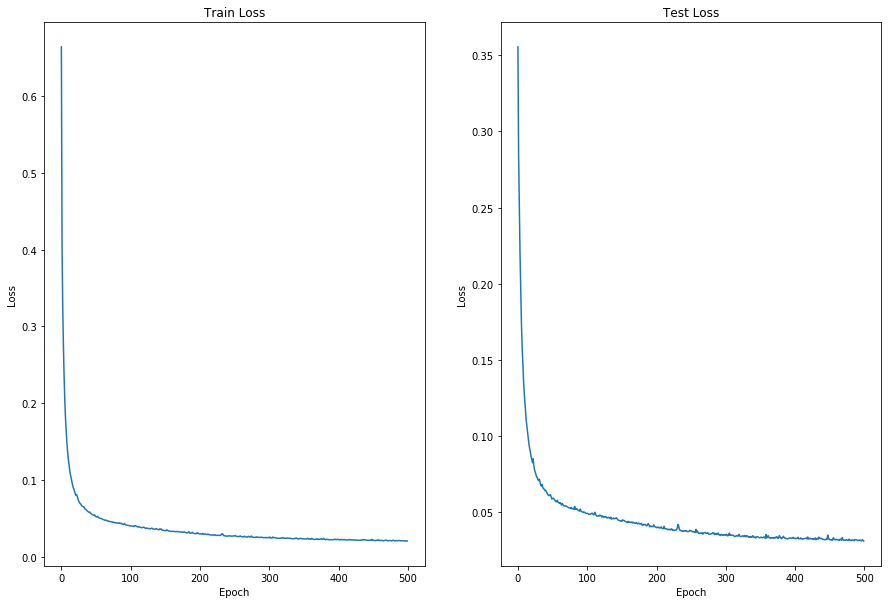

In [10]:
plt.figure(figsize=(15,10))
ax = plt.subplot(1, 2, 1)
plt.plot(history.history["loss"])
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.title("Train Loss")
ax = plt.subplot(1, 2, 2)
plt.plot(history.history["val_loss"])
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.title("Test Loss")

Text(0.5, 1.0, 'Test Loss')

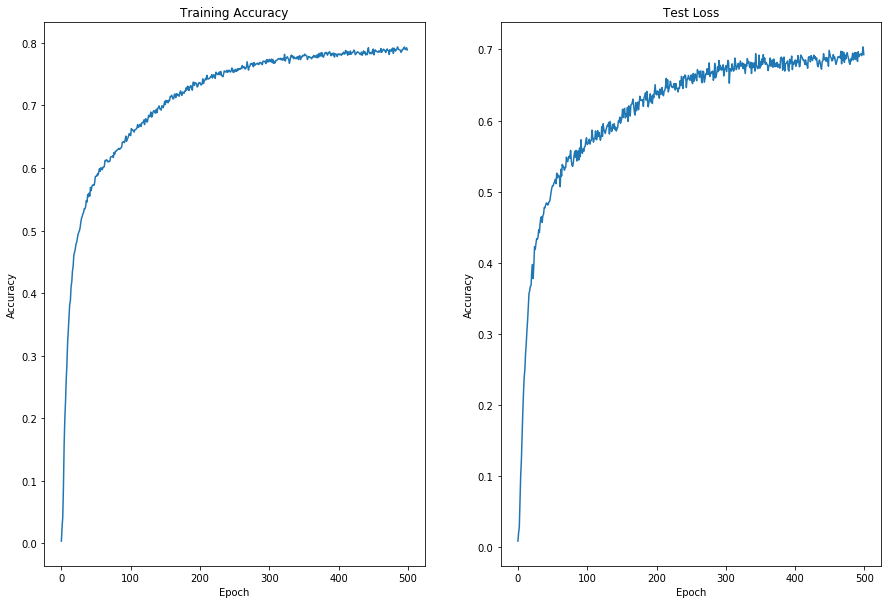

In [11]:
plt.figure(figsize=(15,10))
ax = plt.subplot(1, 2, 1)
plt.plot(history.history["accuracy"])
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.title("Training Accuracy")
ax = plt.subplot(1, 2, 2)
plt.plot(history.history["val_accuracy"])
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.title("Test Loss")

In [12]:
# use our encoded layer to encode the training input
encoder = Model(inputs, encoded)
encoded_input = Input(shape=(350,))
decoder_layer = deep_autoencoder.layers[-1]
decoder = Model(encoded_input, decoder_layer(encoded_input))
encoded_data = encoder.predict(train_df_transformed)

In [13]:
columns=[]
for i in range(0,150):
#     name=
#     print(name)
    columns.append("AE "+str(i))
principalDf = pd.DataFrame(data = encoded_data
             , columns = columns)
principalDf.head(5)

,AE 0,AE 1,AE 2,AE 3,AE 4,AE 5,AE 6,AE 7,AE 8,AE 9,...,AE 140,AE 141,AE 142,AE 143,AE 144,AE 145,AE 146,AE 147,AE 148,AE 149
0,0.065335,0.139940,0.078202,0.0,0.0,0.075525,0.0,0.069621,0.0,0.110420,...,0.0,0.077278,0.063044,0.043014,0.0,0.097807,0.054454,0.0,0.034128,0.080990
1,0.066616,0.122750,0.096759,0.0,0.0,0.054741,0.0,0.068035,0.0,0.096493,...,0.0,0.063537,0.068402,0.052219,0.0,0.097708,0.060967,0.0,0.066338,0.100663
2,0.057327,0.127693,0.091879,0.0,0.0,0.079170,0.0,0.065664,0.0,0.117039,...,0.0,0.078728,0.075728,0.064568,0.0,0.081625,0.060713,0.0,0.049671,0.121425
3,0.065739,0.128492,0.089311,0.0,0.0,0.087994,0.0,0.075496,0.0,0.102895,...,0.0,0.078989,0.062535,0.063695,0.0,0.101543,0.050778,0.0,0.033756,0.105679
4,0.062100,0.118936,0.088985,0.0,0.0,0.084341,0.0,0.073272,0.0,0.087284,...,0.0,0.096880,0.067260,0.072430,0.0,0.092966,0.055894,0.0,0.061583,0.107099


In [14]:
train_df_activities = pd.read_csv(path+"train/X_train.txt", delim_whitespace = True)
train_df_activities.columns = features

train_df_activities["subject_id"] = pd.read_csv(path+"train/subject_train.txt", header = None, squeeze = True) #squeeze = True will 
# #return data in pandas series format

train_df_activities["activity"] = pd.read_csv(path+"train/y_train.txt", header = None, squeeze = True)

activity = pd.read_csv(path+"train/y_train.txt", header = None, squeeze = True)

#mapping activity to activity name
label_name = activity.map({1: "WALKING", 2:"WALKING_UPSTAIRS", 3:"WALKING_DOWNSTAIRS", 4:"SITTING", 5:"STANDING", 6:"LYING"})

train_df_activities["activity_name"] = label_name

In [15]:
principalDf["activity_name"]=train_df_activities.loc[:,["activity_name"]]

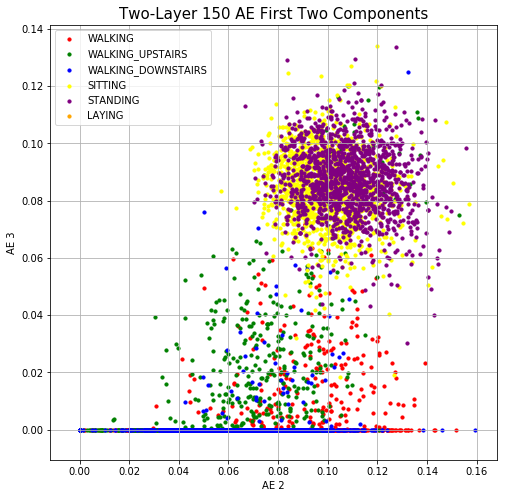

In [36]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('AE 2', fontsize = 10)
ax.set_ylabel('AE 3', fontsize = 10)
ax.set_title('Two-Layer 150 AE First Two Components', fontsize = 15)


targets = ['WALKING', 'WALKING_UPSTAIRS', 'WALKING_DOWNSTAIRS',"SITTING","STANDING","LAYING"]
colors = ['r', 'g', 'b', 'yellow', 'purple','orange']
for target, color in zip(targets,colors):
    indicesToKeep = principalDf['activity_name'] == target
    ax.scatter(principalDf.loc[indicesToKeep, 'AE 2']
               , principalDf.loc[indicesToKeep, 'AE 3']
               , c = color
               , s = 10)
ax.legend(targets)
ax.grid()

In [17]:
input_shape = train_df.shape[1]
inputs = Input(shape=(input_shape))

#Encoder
encoded = Dense(350, activation='relu')(inputs)
encoded = Dense(256, activation='relu')(encoded)
encoded = Dense(128, activation='relu')(encoded)

#Decoder
decoded = Dense(256, activation='relu')(encoded)
decoded = Dense(350, activation='relu')(decoded)
decoded = Dense(input_shape)(decoded)

#Model setup, summary and compilation
deep_autoencoder = Model(inputs, decoded)
deep_autoencoder.summary()
deep_autoencoder.compile(optimizer=tf.keras.optimizers.Adamax(), loss=tf.keras.losses.MeanSquaredError(), metrics=['mae', 'accuracy'])

Model: "functional_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 561)]             0         
_________________________________________________________________
dense_4 (Dense)              (None, 350)               196700    
_________________________________________________________________
dense_5 (Dense)              (None, 256)               89856     
_________________________________________________________________
dense_6 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_7 (Dense)              (None, 256)               33024     
_________________________________________________________________
dense_8 (Dense)              (None, 350)               89950     
_________________________________________________________________
dense_9 (Dense)              (None, 561)              

In [18]:
batch_size = 256

history = deep_autoencoder.fit(
    train_df,
    train_df,
    epochs=1000,
    batch_size=batch_size,
    validation_split=0.2
)

Epoch 1/1000
23/23 [==============================] - 1s 28ms/step - loss: 0.7013 - mae: 0.5890 - accuracy: 0.0036 - val_loss: 0.3885 - val_mae: 0.4107 - val_accuracy: 6.7981e-04
Epoch 2/1000
23/23 [==============================] - 0s 19ms/step - loss: 0.4567 - mae: 0.4213 - accuracy: 0.0056 - val_loss: 0.3253 - val_mae: 0.3652 - val_accuracy: 0.0068
Epoch 3/1000
23/23 [==============================] - 0s 19ms/step - loss: 0.3907 - mae: 0.3812 - accuracy: 0.0196 - val_loss: 0.2939 - val_mae: 0.3387 - val_accuracy: 0.0122
Epoch 4/1000
23/23 [==============================] - 0s 19ms/step - loss: 0.3489 - mae: 0.3535 - accuracy: 0.0252 - val_loss: 0.2760 - val_mae: 0.3242 - val_accuracy: 0.0245
Epoch 5/1000
23/23 [==============================] - 0s 20ms/step - loss: 0.3200 - mae: 0.3370 - accuracy: 0.0415 - val_loss: 0.2625 - val_mae: 0.3147 - val_accuracy: 0.0428
Epoch 6/1000
23/23 [==============================] - 0s 20ms/step - loss: 0.2986 - mae: 0.3256 - accuracy: 0.0685 - val_

23/23 [==============================] - 0s 19ms/step - loss: 0.1026 - mae: 0.2012 - accuracy: 0.3861 - val_loss: 0.1051 - val_mae: 0.2048 - val_accuracy: 0.2984
Epoch 48/1000
23/23 [==============================] - 0s 19ms/step - loss: 0.1009 - mae: 0.1994 - accuracy: 0.3923 - val_loss: 0.1035 - val_mae: 0.2027 - val_accuracy: 0.2957
Epoch 49/1000
23/23 [==============================] - 0s 18ms/step - loss: 0.0999 - mae: 0.1984 - accuracy: 0.3971 - val_loss: 0.1032 - val_mae: 0.2031 - val_accuracy: 0.3086
Epoch 50/1000
23/23 [==============================] - 0s 20ms/step - loss: 0.0987 - mae: 0.1972 - accuracy: 0.3952 - val_loss: 0.1021 - val_mae: 0.2014 - val_accuracy: 0.3046
Epoch 51/1000
23/23 [==============================] - ETA: 0s - loss: 0.0975 - mae: 0.1959 - accuracy: 0.40 - 0s 20ms/step - loss: 0.0975 - mae: 0.1959 - accuracy: 0.4063 - val_loss: 0.1013 - val_mae: 0.2010 - val_accuracy: 0.3066
Epoch 52/1000
23/23 [==============================] - 0s 20ms/step - loss: 0.

23/23 [==============================] - 0s 19ms/step - loss: 0.0701 - mae: 0.1653 - accuracy: 0.4878 - val_loss: 0.0770 - val_mae: 0.1738 - val_accuracy: 0.3827
Epoch 94/1000
23/23 [==============================] - 0s 18ms/step - loss: 0.0695 - mae: 0.1645 - accuracy: 0.4925 - val_loss: 0.0765 - val_mae: 0.1725 - val_accuracy: 0.3916
Epoch 95/1000
23/23 [==============================] - 0s 20ms/step - loss: 0.0692 - mae: 0.1641 - accuracy: 0.4905 - val_loss: 0.0758 - val_mae: 0.1723 - val_accuracy: 0.3990
Epoch 96/1000
23/23 [==============================] - 0s 19ms/step - loss: 0.0689 - mae: 0.1638 - accuracy: 0.4905 - val_loss: 0.0762 - val_mae: 0.1726 - val_accuracy: 0.3895
Epoch 97/1000
23/23 [==============================] - 0s 19ms/step - loss: 0.0688 - mae: 0.1638 - accuracy: 0.4917 - val_loss: 0.0757 - val_mae: 0.1722 - val_accuracy: 0.4052
Epoch 98/1000
23/23 [==============================] - 0s 18ms/step - loss: 0.0683 - mae: 0.1631 - accuracy: 0.4952 - val_loss: 0.0754

23/23 [==============================] - 0s 18ms/step - loss: 0.0572 - mae: 0.1487 - accuracy: 0.5473 - val_loss: 0.0657 - val_mae: 0.1588 - val_accuracy: 0.4419
Epoch 140/1000
23/23 [==============================] - 0s 18ms/step - loss: 0.0569 - mae: 0.1482 - accuracy: 0.5505 - val_loss: 0.0653 - val_mae: 0.1586 - val_accuracy: 0.4426
Epoch 141/1000
23/23 [==============================] - 0s 19ms/step - loss: 0.0567 - mae: 0.1481 - accuracy: 0.5563 - val_loss: 0.0648 - val_mae: 0.1578 - val_accuracy: 0.4507
Epoch 142/1000
23/23 [==============================] - 0s 19ms/step - loss: 0.0567 - mae: 0.1482 - accuracy: 0.5522 - val_loss: 0.0657 - val_mae: 0.1593 - val_accuracy: 0.4541
Epoch 143/1000
23/23 [==============================] - 0s 19ms/step - loss: 0.0566 - mae: 0.1482 - accuracy: 0.5517 - val_loss: 0.0651 - val_mae: 0.1583 - val_accuracy: 0.4521
Epoch 144/1000
23/23 [==============================] - 0s 19ms/step - loss: 0.0561 - mae: 0.1473 - accuracy: 0.5498 - val_loss: 0

23/23 [==============================] - 0s 19ms/step - loss: 0.0504 - mae: 0.1387 - accuracy: 0.5830 - val_loss: 0.0601 - val_mae: 0.1506 - val_accuracy: 0.4820
Epoch 186/1000
23/23 [==============================] - 0s 18ms/step - loss: 0.0503 - mae: 0.1388 - accuracy: 0.5837 - val_loss: 0.0599 - val_mae: 0.1500 - val_accuracy: 0.4854
Epoch 187/1000
23/23 [==============================] - 0s 18ms/step - loss: 0.0500 - mae: 0.1382 - accuracy: 0.5849 - val_loss: 0.0598 - val_mae: 0.1504 - val_accuracy: 0.4922
Epoch 188/1000
23/23 [==============================] - 0s 18ms/step - loss: 0.0502 - mae: 0.1387 - accuracy: 0.5859 - val_loss: 0.0602 - val_mae: 0.1505 - val_accuracy: 0.4779
Epoch 189/1000
23/23 [==============================] - 0s 19ms/step - loss: 0.0501 - mae: 0.1384 - accuracy: 0.5820 - val_loss: 0.0599 - val_mae: 0.1504 - val_accuracy: 0.4888
Epoch 190/1000
23/23 [==============================] - 0s 19ms/step - loss: 0.0498 - mae: 0.1380 - accuracy: 0.5835 - val_loss: 0

23/23 [==============================] - 0s 20ms/step - loss: 0.0460 - mae: 0.1319 - accuracy: 0.6075 - val_loss: 0.0570 - val_mae: 0.1456 - val_accuracy: 0.5167
Epoch 232/1000
23/23 [==============================] - 0s 20ms/step - loss: 0.0461 - mae: 0.1324 - accuracy: 0.6075 - val_loss: 0.0569 - val_mae: 0.1454 - val_accuracy: 0.5003
Epoch 233/1000
23/23 [==============================] - 0s 19ms/step - loss: 0.0460 - mae: 0.1322 - accuracy: 0.6092 - val_loss: 0.0572 - val_mae: 0.1462 - val_accuracy: 0.4969
Epoch 234/1000
23/23 [==============================] - 0s 19ms/step - loss: 0.0461 - mae: 0.1324 - accuracy: 0.6066 - val_loss: 0.0569 - val_mae: 0.1459 - val_accuracy: 0.5133
Epoch 235/1000
23/23 [==============================] - 0s 19ms/step - loss: 0.0462 - mae: 0.1328 - accuracy: 0.6071 - val_loss: 0.0568 - val_mae: 0.1454 - val_accuracy: 0.5105
Epoch 236/1000
23/23 [==============================] - 0s 19ms/step - loss: 0.0462 - mae: 0.1327 - accuracy: 0.6046 - val_loss: 0

23/23 [==============================] - 0s 18ms/step - loss: 0.0430 - mae: 0.1277 - accuracy: 0.6294 - val_loss: 0.0550 - val_mae: 0.1428 - val_accuracy: 0.5153
Epoch 278/1000
23/23 [==============================] - 0s 20ms/step - loss: 0.0430 - mae: 0.1279 - accuracy: 0.6282 - val_loss: 0.0551 - val_mae: 0.1429 - val_accuracy: 0.5112
Epoch 279/1000
23/23 [==============================] - 0s 20ms/step - loss: 0.0433 - mae: 0.1285 - accuracy: 0.6330 - val_loss: 0.0550 - val_mae: 0.1430 - val_accuracy: 0.5207
Epoch 280/1000
23/23 [==============================] - 0s 20ms/step - loss: 0.0429 - mae: 0.1278 - accuracy: 0.6277 - val_loss: 0.0548 - val_mae: 0.1422 - val_accuracy: 0.5160
Epoch 281/1000
23/23 [==============================] - 0s 19ms/step - loss: 0.0430 - mae: 0.1279 - accuracy: 0.6265 - val_loss: 0.0545 - val_mae: 0.1419 - val_accuracy: 0.5173
Epoch 282/1000
23/23 [==============================] - 0s 19ms/step - loss: 0.0430 - mae: 0.1282 - accuracy: 0.6344 - val_loss: 0

23/23 [==============================] - 0s 18ms/step - loss: 0.0406 - mae: 0.1243 - accuracy: 0.6485 - val_loss: 0.0530 - val_mae: 0.1397 - val_accuracy: 0.5438
Epoch 324/1000
23/23 [==============================] - 0s 18ms/step - loss: 0.0407 - mae: 0.1244 - accuracy: 0.6442 - val_loss: 0.0535 - val_mae: 0.1405 - val_accuracy: 0.5337
Epoch 325/1000
23/23 [==============================] - 0s 20ms/step - loss: 0.0408 - mae: 0.1247 - accuracy: 0.6447 - val_loss: 0.0532 - val_mae: 0.1401 - val_accuracy: 0.5500
Epoch 326/1000
23/23 [==============================] - 0s 20ms/step - loss: 0.0405 - mae: 0.1242 - accuracy: 0.6476 - val_loss: 0.0528 - val_mae: 0.1399 - val_accuracy: 0.5432
Epoch 327/1000
23/23 [==============================] - 0s 19ms/step - loss: 0.0405 - mae: 0.1243 - accuracy: 0.6509 - val_loss: 0.0530 - val_mae: 0.1399 - val_accuracy: 0.5404
Epoch 328/1000
23/23 [==============================] - 0s 19ms/step - loss: 0.0405 - mae: 0.1242 - accuracy: 0.6471 - val_loss: 0

23/23 [==============================] - 0s 21ms/step - loss: 0.0388 - mae: 0.1218 - accuracy: 0.6611 - val_loss: 0.0519 - val_mae: 0.1379 - val_accuracy: 0.5506
Epoch 370/1000
23/23 [==============================] - 0s 19ms/step - loss: 0.0389 - mae: 0.1219 - accuracy: 0.6638 - val_loss: 0.0522 - val_mae: 0.1380 - val_accuracy: 0.5452
Epoch 371/1000
23/23 [==============================] - 1s 22ms/step - loss: 0.0385 - mae: 0.1207 - accuracy: 0.6582 - val_loss: 0.0514 - val_mae: 0.1370 - val_accuracy: 0.5500
Epoch 372/1000
23/23 [==============================] - 0s 21ms/step - loss: 0.0384 - mae: 0.1206 - accuracy: 0.6633 - val_loss: 0.0512 - val_mae: 0.1368 - val_accuracy: 0.5452
Epoch 373/1000
23/23 [==============================] - 0s 21ms/step - loss: 0.0385 - mae: 0.1208 - accuracy: 0.6594 - val_loss: 0.0516 - val_mae: 0.1373 - val_accuracy: 0.5540
Epoch 374/1000
23/23 [==============================] - 0s 20ms/step - loss: 0.0386 - mae: 0.1212 - accuracy: 0.6590 - val_loss: 0

23/23 [==============================] - 0s 19ms/step - loss: 0.0376 - mae: 0.1197 - accuracy: 0.6660 - val_loss: 0.0511 - val_mae: 0.1368 - val_accuracy: 0.5615
Epoch 416/1000
23/23 [==============================] - 0s 19ms/step - loss: 0.0372 - mae: 0.1185 - accuracy: 0.6709 - val_loss: 0.0508 - val_mae: 0.1356 - val_accuracy: 0.5710
Epoch 417/1000
23/23 [==============================] - 0s 19ms/step - loss: 0.0372 - mae: 0.1186 - accuracy: 0.6757 - val_loss: 0.0505 - val_mae: 0.1350 - val_accuracy: 0.5649
Epoch 418/1000
23/23 [==============================] - 0s 19ms/step - loss: 0.0370 - mae: 0.1182 - accuracy: 0.6716 - val_loss: 0.0510 - val_mae: 0.1362 - val_accuracy: 0.5670
Epoch 419/1000
23/23 [==============================] - 0s 19ms/step - loss: 0.0375 - mae: 0.1198 - accuracy: 0.6743 - val_loss: 0.0507 - val_mae: 0.1360 - val_accuracy: 0.5663
Epoch 420/1000
23/23 [==============================] - 0s 19ms/step - loss: 0.0370 - mae: 0.1180 - accuracy: 0.6755 - val_loss: 0

23/23 [==============================] - 0s 20ms/step - loss: 0.0362 - mae: 0.1169 - accuracy: 0.6830 - val_loss: 0.0502 - val_mae: 0.1343 - val_accuracy: 0.5751
Epoch 462/1000
23/23 [==============================] - 0s 19ms/step - loss: 0.0360 - mae: 0.1165 - accuracy: 0.6811 - val_loss: 0.0501 - val_mae: 0.1343 - val_accuracy: 0.5704
Epoch 463/1000
23/23 [==============================] - 0s 22ms/step - loss: 0.0363 - mae: 0.1170 - accuracy: 0.6803 - val_loss: 0.0503 - val_mae: 0.1344 - val_accuracy: 0.5738
Epoch 464/1000
23/23 [==============================] - 0s 20ms/step - loss: 0.0361 - mae: 0.1167 - accuracy: 0.6793 - val_loss: 0.0501 - val_mae: 0.1340 - val_accuracy: 0.5806
Epoch 465/1000
23/23 [==============================] - 0s 20ms/step - loss: 0.0360 - mae: 0.1163 - accuracy: 0.6794 - val_loss: 0.0503 - val_mae: 0.1347 - val_accuracy: 0.5778
Epoch 466/1000
23/23 [==============================] - 0s 21ms/step - loss: 0.0359 - mae: 0.1162 - accuracy: 0.6781 - val_loss: 0

23/23 [==============================] - 0s 20ms/step - loss: 0.0352 - mae: 0.1154 - accuracy: 0.6844 - val_loss: 0.0501 - val_mae: 0.1336 - val_accuracy: 0.5785
Epoch 508/1000
23/23 [==============================] - 0s 19ms/step - loss: 0.0351 - mae: 0.1147 - accuracy: 0.6859 - val_loss: 0.0501 - val_mae: 0.1346 - val_accuracy: 0.5772
Epoch 509/1000
23/23 [==============================] - 0s 19ms/step - loss: 0.0351 - mae: 0.1149 - accuracy: 0.6844 - val_loss: 0.0499 - val_mae: 0.1337 - val_accuracy: 0.5751
Epoch 510/1000
23/23 [==============================] - 0s 19ms/step - loss: 0.0350 - mae: 0.1148 - accuracy: 0.6886 - val_loss: 0.0495 - val_mae: 0.1331 - val_accuracy: 0.5690
Epoch 511/1000
23/23 [==============================] - 0s 20ms/step - loss: 0.0350 - mae: 0.1148 - accuracy: 0.6850 - val_loss: 0.0498 - val_mae: 0.1336 - val_accuracy: 0.5731
Epoch 512/1000
23/23 [==============================] - 0s 19ms/step - loss: 0.0352 - mae: 0.1153 - accuracy: 0.6850 - val_loss: 0

23/23 [==============================] - 0s 19ms/step - loss: 0.0343 - mae: 0.1134 - accuracy: 0.6927 - val_loss: 0.0496 - val_mae: 0.1331 - val_accuracy: 0.5744
Epoch 554/1000
23/23 [==============================] - 0s 20ms/step - loss: 0.0343 - mae: 0.1136 - accuracy: 0.6905 - val_loss: 0.0499 - val_mae: 0.1333 - val_accuracy: 0.5738
Epoch 555/1000
23/23 [==============================] - 0s 21ms/step - loss: 0.0343 - mae: 0.1135 - accuracy: 0.6920 - val_loss: 0.0497 - val_mae: 0.1338 - val_accuracy: 0.5738
Epoch 556/1000
23/23 [==============================] - 0s 20ms/step - loss: 0.0346 - mae: 0.1144 - accuracy: 0.6889 - val_loss: 0.0499 - val_mae: 0.1336 - val_accuracy: 0.5622
Epoch 557/1000
23/23 [==============================] - 0s 20ms/step - loss: 0.0346 - mae: 0.1144 - accuracy: 0.6910 - val_loss: 0.0502 - val_mae: 0.1343 - val_accuracy: 0.5744
Epoch 558/1000
23/23 [==============================] - 0s 20ms/step - loss: 0.0345 - mae: 0.1141 - accuracy: 0.6946 - val_loss: 0

23/23 [==============================] - 0s 20ms/step - loss: 0.0336 - mae: 0.1124 - accuracy: 0.6995 - val_loss: 0.0494 - val_mae: 0.1324 - val_accuracy: 0.5819
Epoch 600/1000
23/23 [==============================] - 0s 19ms/step - loss: 0.0337 - mae: 0.1126 - accuracy: 0.6976 - val_loss: 0.0497 - val_mae: 0.1334 - val_accuracy: 0.5785
Epoch 601/1000
23/23 [==============================] - 0s 20ms/step - loss: 0.0339 - mae: 0.1131 - accuracy: 0.6973 - val_loss: 0.0495 - val_mae: 0.1332 - val_accuracy: 0.5840
Epoch 602/1000
23/23 [==============================] - 0s 20ms/step - loss: 0.0336 - mae: 0.1124 - accuracy: 0.6939 - val_loss: 0.0494 - val_mae: 0.1323 - val_accuracy: 0.5833
Epoch 603/1000
23/23 [==============================] - 0s 20ms/step - loss: 0.0335 - mae: 0.1122 - accuracy: 0.6971 - val_loss: 0.0497 - val_mae: 0.1328 - val_accuracy: 0.5704
Epoch 604/1000
23/23 [==============================] - 0s 19ms/step - loss: 0.0335 - mae: 0.1121 - accuracy: 0.6951 - val_loss: 0

23/23 [==============================] - 0s 21ms/step - loss: 0.0330 - mae: 0.1113 - accuracy: 0.6995 - val_loss: 0.0490 - val_mae: 0.1315 - val_accuracy: 0.5738
Epoch 646/1000
23/23 [==============================] - 0s 20ms/step - loss: 0.0330 - mae: 0.1113 - accuracy: 0.7017 - val_loss: 0.0492 - val_mae: 0.1320 - val_accuracy: 0.5867
Epoch 647/1000
23/23 [==============================] - 0s 18ms/step - loss: 0.0332 - mae: 0.1123 - accuracy: 0.7012 - val_loss: 0.0496 - val_mae: 0.1328 - val_accuracy: 0.5874
Epoch 648/1000
23/23 [==============================] - 0s 21ms/step - loss: 0.0330 - mae: 0.1116 - accuracy: 0.7019 - val_loss: 0.0493 - val_mae: 0.1325 - val_accuracy: 0.5833
Epoch 649/1000
23/23 [==============================] - 1s 26ms/step - loss: 0.0331 - mae: 0.1117 - accuracy: 0.7026 - val_loss: 0.0492 - val_mae: 0.1322 - val_accuracy: 0.5840
Epoch 650/1000
23/23 [==============================] - 0s 22ms/step - loss: 0.0330 - mae: 0.1117 - accuracy: 0.7019 - val_loss: 0

23/23 [==============================] - 0s 21ms/step - loss: 0.0325 - mae: 0.1106 - accuracy: 0.7049 - val_loss: 0.0487 - val_mae: 0.1314 - val_accuracy: 0.5901
Epoch 692/1000
23/23 [==============================] - 1s 22ms/step - loss: 0.0322 - mae: 0.1102 - accuracy: 0.7044 - val_loss: 0.0485 - val_mae: 0.1312 - val_accuracy: 0.5799
Epoch 693/1000
23/23 [==============================] - 0s 21ms/step - loss: 0.0323 - mae: 0.1104 - accuracy: 0.7043 - val_loss: 0.0488 - val_mae: 0.1311 - val_accuracy: 0.5867
Epoch 694/1000
23/23 [==============================] - 1s 22ms/step - loss: 0.0322 - mae: 0.1102 - accuracy: 0.7054 - val_loss: 0.0487 - val_mae: 0.1312 - val_accuracy: 0.5819
Epoch 695/1000
23/23 [==============================] - 1s 22ms/step - loss: 0.0322 - mae: 0.1104 - accuracy: 0.7068 - val_loss: 0.0487 - val_mae: 0.1312 - val_accuracy: 0.5928
Epoch 696/1000
23/23 [==============================] - 0s 21ms/step - loss: 0.0321 - mae: 0.1099 - accuracy: 0.7058 - val_loss: 0

23/23 [==============================] - 1s 25ms/step - loss: 0.0317 - mae: 0.1094 - accuracy: 0.7090 - val_loss: 0.0485 - val_mae: 0.1316 - val_accuracy: 0.5921
Epoch 738/1000
23/23 [==============================] - 1s 22ms/step - loss: 0.0317 - mae: 0.1096 - accuracy: 0.7119 - val_loss: 0.0483 - val_mae: 0.1307 - val_accuracy: 0.5833
Epoch 739/1000
23/23 [==============================] - 1s 23ms/step - loss: 0.0318 - mae: 0.1096 - accuracy: 0.7077 - val_loss: 0.0485 - val_mae: 0.1315 - val_accuracy: 0.5942
Epoch 740/1000
23/23 [==============================] - 1s 26ms/step - loss: 0.0319 - mae: 0.1099 - accuracy: 0.7092 - val_loss: 0.0484 - val_mae: 0.1304 - val_accuracy: 0.5962
Epoch 741/1000
23/23 [==============================] - 1s 25ms/step - loss: 0.0316 - mae: 0.1091 - accuracy: 0.7100 - val_loss: 0.0483 - val_mae: 0.1307 - val_accuracy: 0.5908
Epoch 742/1000
23/23 [==============================] - 1s 23ms/step - loss: 0.0316 - mae: 0.1093 - accuracy: 0.7066 - val_loss: 0

23/23 [==============================] - 1s 24ms/step - loss: 0.0311 - mae: 0.1083 - accuracy: 0.7095 - val_loss: 0.0482 - val_mae: 0.1305 - val_accuracy: 0.5962
Epoch 784/1000
23/23 [==============================] - 1s 24ms/step - loss: 0.0312 - mae: 0.1084 - accuracy: 0.7167 - val_loss: 0.0481 - val_mae: 0.1305 - val_accuracy: 0.5928
Epoch 785/1000
23/23 [==============================] - 1s 23ms/step - loss: 0.0312 - mae: 0.1087 - accuracy: 0.7145 - val_loss: 0.0483 - val_mae: 0.1310 - val_accuracy: 0.5860
Epoch 786/1000
23/23 [==============================] - 0s 21ms/step - loss: 0.0311 - mae: 0.1084 - accuracy: 0.7148 - val_loss: 0.0483 - val_mae: 0.1309 - val_accuracy: 0.5880
Epoch 787/1000
23/23 [==============================] - 0s 20ms/step - loss: 0.0311 - mae: 0.1082 - accuracy: 0.7124 - val_loss: 0.0486 - val_mae: 0.1309 - val_accuracy: 0.5860
Epoch 788/1000
23/23 [==============================] - 0s 18ms/step - loss: 0.0313 - mae: 0.1089 - accuracy: 0.7107 - val_loss: 0

23/23 [==============================] - 1s 22ms/step - loss: 0.0306 - mae: 0.1075 - accuracy: 0.7134 - val_loss: 0.0482 - val_mae: 0.1309 - val_accuracy: 0.5969
Epoch 830/1000
23/23 [==============================] - 1s 22ms/step - loss: 0.0307 - mae: 0.1078 - accuracy: 0.7150 - val_loss: 0.0483 - val_mae: 0.1310 - val_accuracy: 0.5792
Epoch 831/1000
23/23 [==============================] - 1s 25ms/step - loss: 0.0309 - mae: 0.1082 - accuracy: 0.7124 - val_loss: 0.0485 - val_mae: 0.1315 - val_accuracy: 0.5867
Epoch 832/1000
23/23 [==============================] - 1s 25ms/step - loss: 0.0308 - mae: 0.1080 - accuracy: 0.7158 - val_loss: 0.0479 - val_mae: 0.1303 - val_accuracy: 0.5894
Epoch 833/1000
23/23 [==============================] - 1s 24ms/step - loss: 0.0306 - mae: 0.1077 - accuracy: 0.7146 - val_loss: 0.0480 - val_mae: 0.1304 - val_accuracy: 0.5812
Epoch 834/1000
23/23 [==============================] - 0s 22ms/step - loss: 0.0306 - mae: 0.1076 - accuracy: 0.7175 - val_loss: 0

23/23 [==============================] - 0s 21ms/step - loss: 0.0304 - mae: 0.1076 - accuracy: 0.7156 - val_loss: 0.0478 - val_mae: 0.1300 - val_accuracy: 0.5982
Epoch 876/1000
23/23 [==============================] - 0s 21ms/step - loss: 0.0302 - mae: 0.1066 - accuracy: 0.7202 - val_loss: 0.0476 - val_mae: 0.1290 - val_accuracy: 0.5901
Epoch 877/1000
23/23 [==============================] - 0s 20ms/step - loss: 0.0302 - mae: 0.1069 - accuracy: 0.7163 - val_loss: 0.0477 - val_mae: 0.1294 - val_accuracy: 0.5806
Epoch 878/1000
23/23 [==============================] - 0s 21ms/step - loss: 0.0302 - mae: 0.1069 - accuracy: 0.7219 - val_loss: 0.0477 - val_mae: 0.1298 - val_accuracy: 0.5880
Epoch 879/1000
23/23 [==============================] - 0s 21ms/step - loss: 0.0301 - mae: 0.1067 - accuracy: 0.7175 - val_loss: 0.0476 - val_mae: 0.1294 - val_accuracy: 0.5853
Epoch 880/1000
23/23 [==============================] - 0s 21ms/step - loss: 0.0302 - mae: 0.1068 - accuracy: 0.7155 - val_loss: 0

23/23 [==============================] - 0s 20ms/step - loss: 0.0296 - mae: 0.1060 - accuracy: 0.7226 - val_loss: 0.0473 - val_mae: 0.1296 - val_accuracy: 0.5921
Epoch 922/1000
23/23 [==============================] - 0s 20ms/step - loss: 0.0295 - mae: 0.1057 - accuracy: 0.7221 - val_loss: 0.0472 - val_mae: 0.1289 - val_accuracy: 0.5928
Epoch 923/1000
23/23 [==============================] - 0s 19ms/step - loss: 0.0295 - mae: 0.1054 - accuracy: 0.7243 - val_loss: 0.0470 - val_mae: 0.1284 - val_accuracy: 0.5989
Epoch 924/1000
23/23 [==============================] - 0s 19ms/step - loss: 0.0297 - mae: 0.1060 - accuracy: 0.7253 - val_loss: 0.0473 - val_mae: 0.1298 - val_accuracy: 0.5996
Epoch 925/1000
23/23 [==============================] - 0s 19ms/step - loss: 0.0296 - mae: 0.1060 - accuracy: 0.7180 - val_loss: 0.0471 - val_mae: 0.1288 - val_accuracy: 0.5840
Epoch 926/1000
23/23 [==============================] - 0s 19ms/step - loss: 0.0296 - mae: 0.1058 - accuracy: 0.7211 - val_loss: 0

23/23 [==============================] - 0s 20ms/step - loss: 0.0292 - mae: 0.1053 - accuracy: 0.7267 - val_loss: 0.0472 - val_mae: 0.1289 - val_accuracy: 0.5928
Epoch 968/1000
23/23 [==============================] - 0s 19ms/step - loss: 0.0292 - mae: 0.1053 - accuracy: 0.7241 - val_loss: 0.0470 - val_mae: 0.1287 - val_accuracy: 0.6016
Epoch 969/1000
23/23 [==============================] - 0s 20ms/step - loss: 0.0291 - mae: 0.1051 - accuracy: 0.7204 - val_loss: 0.0471 - val_mae: 0.1289 - val_accuracy: 0.5908
Epoch 970/1000
23/23 [==============================] - 0s 20ms/step - loss: 0.0291 - mae: 0.1050 - accuracy: 0.7206 - val_loss: 0.0473 - val_mae: 0.1288 - val_accuracy: 0.5962
Epoch 971/1000
23/23 [==============================] - 0s 20ms/step - loss: 0.0291 - mae: 0.1051 - accuracy: 0.7248 - val_loss: 0.0470 - val_mae: 0.1288 - val_accuracy: 0.5955
Epoch 972/1000
23/23 [==============================] - 0s 20ms/step - loss: 0.0292 - mae: 0.1055 - accuracy: 0.7252 - val_loss: 0

Text(0.5, 1.0, 'Test Loss')

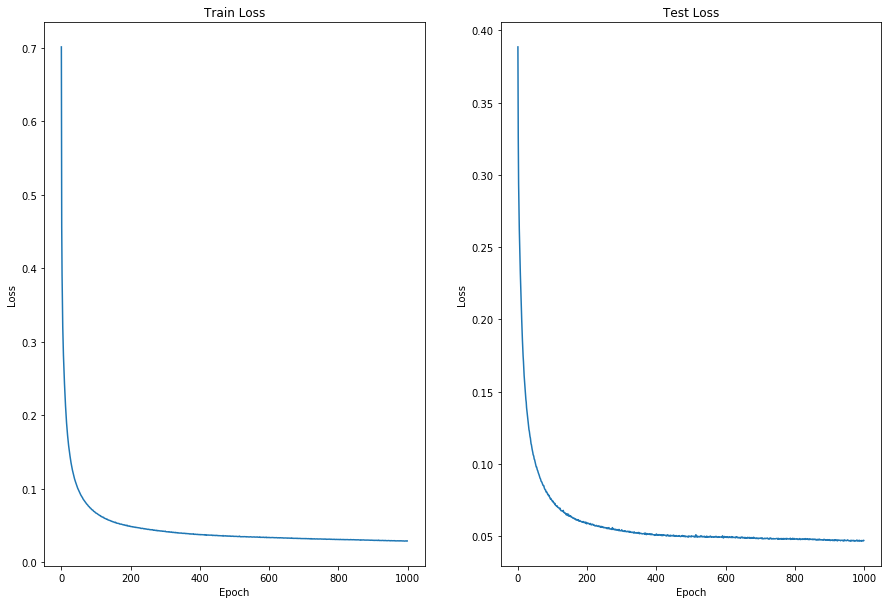

In [19]:
plt.figure(figsize=(15,10))
ax = plt.subplot(1, 2, 1)
plt.plot(history.history["loss"])
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.title("Train Loss")
ax = plt.subplot(1, 2, 2)
plt.plot(history.history["val_loss"])
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.title("Test Loss")

Text(0.5, 1.0, 'Test Loss')

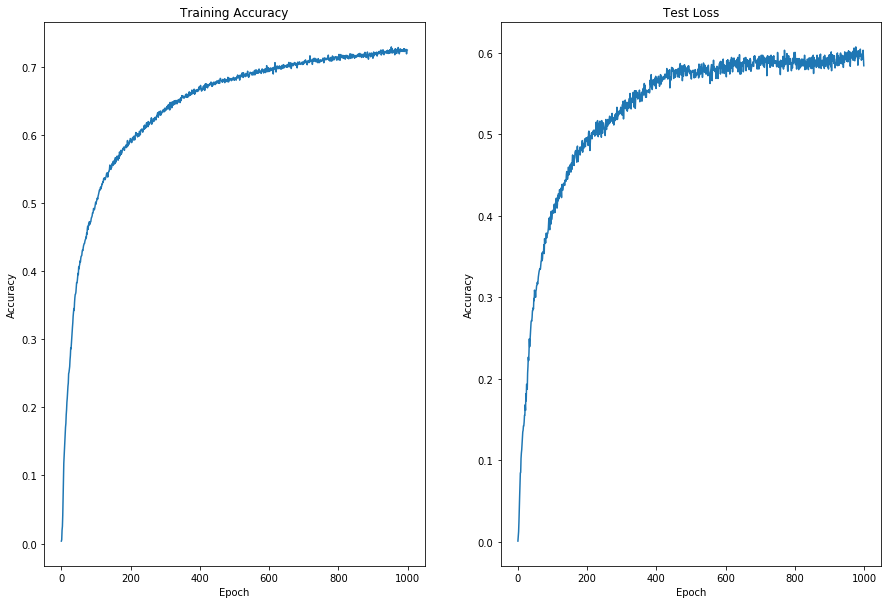

In [20]:
plt.figure(figsize=(15,10))
ax = plt.subplot(1, 2, 1)
plt.plot(history.history["accuracy"])
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.title("Training Accuracy")
ax = plt.subplot(1, 2, 2)
plt.plot(history.history["val_accuracy"])
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.title("Test Loss")

In [21]:
# use our encoded layer to encode the training input
encoder = Model(inputs, encoded)
encoded_input = Input(shape=(350,))
decoder_layer = deep_autoencoder.layers[-1]
decoder = Model(encoded_input, decoder_layer(encoded_input))
encoded_data = encoder.predict(train_df_transformed)

In [22]:
columns=[]
for i in range(0,128):
#     name=
#     print(name)
    columns.append("AE "+str(i))
principalDf = pd.DataFrame(data = encoded_data
             , columns = columns)
principalDf.head(5)

,AE 0,AE 1,AE 2,AE 3,AE 4,AE 5,AE 6,AE 7,AE 8,AE 9,...,AE 118,AE 119,AE 120,AE 121,AE 122,AE 123,AE 124,AE 125,AE 126,AE 127
0,0.408949,0.106179,0.0,0.0,0.0,0.157227,0.185228,0.138232,0.277079,0.126325,...,0.210021,0.196026,0.283308,0.0,0.181382,0.0,0.0,0.187878,0.0,0.0
1,0.407030,0.105076,0.0,0.0,0.0,0.156732,0.156000,0.150419,0.262879,0.132822,...,0.191877,0.205377,0.253258,0.0,0.156378,0.0,0.0,0.171610,0.0,0.0
2,0.412090,0.088189,0.0,0.0,0.0,0.170068,0.179936,0.173855,0.281492,0.130856,...,0.180849,0.225269,0.305527,0.0,0.161449,0.0,0.0,0.136525,0.0,0.0
3,0.400115,0.092310,0.0,0.0,0.0,0.163492,0.163728,0.147740,0.267005,0.131129,...,0.222979,0.216699,0.280481,0.0,0.163386,0.0,0.0,0.148384,0.0,0.0
4,0.407794,0.080761,0.0,0.0,0.0,0.171763,0.166863,0.142269,0.302098,0.137585,...,0.199160,0.211230,0.291566,0.0,0.153412,0.0,0.0,0.140729,0.0,0.0


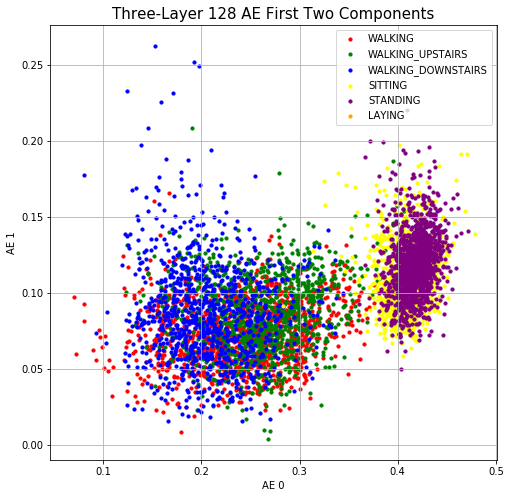

In [23]:
principalDf["activity_name"]=train_df_activities.loc[:,["activity_name"]]

fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('AE 0', fontsize = 10)
ax.set_ylabel('AE 1', fontsize = 10)
ax.set_title('Three-Layer 128 AE First Two Components', fontsize = 15)


targets = ['WALKING', 'WALKING_UPSTAIRS', 'WALKING_DOWNSTAIRS',"SITTING","STANDING","LAYING"]
colors = ['r', 'g', 'b', 'yellow', 'purple','orange']
for target, color in zip(targets,colors):
    indicesToKeep = principalDf['activity_name'] == target
    ax.scatter(principalDf.loc[indicesToKeep, 'AE 0']
               , principalDf.loc[indicesToKeep, 'AE 1']
               , c = color
               , s = 10)
ax.legend(targets)
ax.grid()

In [24]:
input_shape = train_df.shape[1]
inputs = Input(shape=(input_shape))

#Encoder
encoded = Dense(450, activation='relu')(inputs)
encoded = Dense(300, activation='relu')(encoded)
encoded = Dense(150, activation='relu')(encoded)

#Decoder
decoded = Dense(300, activation='relu')(encoded)
decoded = Dense(450, activation='relu')(decoded)
decoded = Dense(input_shape)(decoded)

#Model setup, summary and compilation
deep_autoencoder = Model(inputs, decoded)
deep_autoencoder.summary()
deep_autoencoder.compile(optimizer=tf.keras.optimizers.Adam(), loss=tf.keras.losses.MeanSquaredError(), metrics=['mean_squared_error','accuracy'])

Model: "functional_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         [(None, 561)]             0         
_________________________________________________________________
dense_10 (Dense)             (None, 450)               252900    
_________________________________________________________________
dense_11 (Dense)             (None, 300)               135300    
_________________________________________________________________
dense_12 (Dense)             (None, 150)               45150     
_________________________________________________________________
dense_13 (Dense)             (None, 300)               45300     
_________________________________________________________________
dense_14 (Dense)             (None, 450)               135450    
_________________________________________________________________
dense_15 (Dense)             (None, 561)             

In [25]:
batch_size = 256

history = deep_autoencoder.fit(
    train_df,
    train_df,
    epochs=500,
    batch_size=batch_size,
    validation_split=0.2
)

Epoch 1/500
23/23 [==============================] - 1s 45ms/step - loss: 0.6326 - mean_squared_error: 0.6326 - accuracy: 0.0049 - val_loss: 0.3463 - val_mean_squared_error: 0.3463 - val_accuracy: 0.0027
Epoch 2/500
23/23 [==============================] - 1s 29ms/step - loss: 0.3904 - mean_squared_error: 0.3904 - accuracy: 0.0158 - val_loss: 0.2846 - val_mean_squared_error: 0.2846 - val_accuracy: 0.0150
Epoch 3/500
23/23 [==============================] - 1s 29ms/step - loss: 0.3170 - mean_squared_error: 0.3170 - accuracy: 0.0396 - val_loss: 0.2559 - val_mean_squared_error: 0.2559 - val_accuracy: 0.0469
Epoch 4/500
23/23 [==============================] - 1s 30ms/step - loss: 0.2785 - mean_squared_error: 0.2785 - accuracy: 0.0774 - val_loss: 0.2315 - val_mean_squared_error: 0.2315 - val_accuracy: 0.0680
Epoch 5/500
23/23 [==============================] - 1s 28ms/step - loss: 0.2479 - mean_squared_error: 0.2479 - accuracy: 0.1112 - val_loss: 0.2096 - val_mean_squared_error: 0.2096 - v

23/23 [==============================] - 1s 26ms/step - loss: 0.0700 - mean_squared_error: 0.0700 - accuracy: 0.4988 - val_loss: 0.0802 - val_mean_squared_error: 0.0802 - val_accuracy: 0.3787
Epoch 42/500
23/23 [==============================] - 1s 27ms/step - loss: 0.0692 - mean_squared_error: 0.0692 - accuracy: 0.5032 - val_loss: 0.0783 - val_mean_squared_error: 0.0783 - val_accuracy: 0.4018
Epoch 43/500
23/23 [==============================] - 1s 27ms/step - loss: 0.0713 - mean_squared_error: 0.0713 - accuracy: 0.5053 - val_loss: 0.0786 - val_mean_squared_error: 0.0786 - val_accuracy: 0.3950
Epoch 44/500
23/23 [==============================] - 1s 28ms/step - loss: 0.0675 - mean_squared_error: 0.0675 - accuracy: 0.5117 - val_loss: 0.0772 - val_mean_squared_error: 0.0772 - val_accuracy: 0.3902
Epoch 45/500
23/23 [==============================] - 1s 30ms/step - loss: 0.0665 - mean_squared_error: 0.0665 - accuracy: 0.5151 - val_loss: 0.0753 - val_mean_squared_error: 0.0753 - val_accur

23/23 [==============================] - 1s 31ms/step - loss: 0.0491 - mean_squared_error: 0.0491 - accuracy: 0.5974 - val_loss: 0.0613 - val_mean_squared_error: 0.0613 - val_accuracy: 0.4976
Epoch 82/500
23/23 [==============================] - 1s 31ms/step - loss: 0.0481 - mean_squared_error: 0.0481 - accuracy: 0.6020 - val_loss: 0.0608 - val_mean_squared_error: 0.0608 - val_accuracy: 0.4949
Epoch 83/500
23/23 [==============================] - 1s 28ms/step - loss: 0.0483 - mean_squared_error: 0.0483 - accuracy: 0.6012 - val_loss: 0.0608 - val_mean_squared_error: 0.0608 - val_accuracy: 0.5071
Epoch 84/500
23/23 [==============================] - ETA: 0s - loss: 0.0479 - mean_squared_error: 0.0479 - accuracy: 0.604 - 1s 27ms/step - loss: 0.0478 - mean_squared_error: 0.0478 - accuracy: 0.6070 - val_loss: 0.0609 - val_mean_squared_error: 0.0609 - val_accuracy: 0.5099
Epoch 85/500
23/23 [==============================] - 1s 27ms/step - loss: 0.0474 - mean_squared_error: 0.0474 - accuracy

23/23 [==============================] - 1s 27ms/step - loss: 0.0413 - mean_squared_error: 0.0413 - accuracy: 0.6451 - val_loss: 0.0554 - val_mean_squared_error: 0.0554 - val_accuracy: 0.5445
Epoch 121/500
23/23 [==============================] - 1s 25ms/step - loss: 0.0413 - mean_squared_error: 0.0413 - accuracy: 0.6449 - val_loss: 0.0557 - val_mean_squared_error: 0.0557 - val_accuracy: 0.5527
Epoch 122/500
23/23 [==============================] - 1s 25ms/step - loss: 0.0428 - mean_squared_error: 0.0428 - accuracy: 0.6425 - val_loss: 0.0550 - val_mean_squared_error: 0.0550 - val_accuracy: 0.5500
Epoch 123/500
23/23 [==============================] - 1s 26ms/step - loss: 0.0398 - mean_squared_error: 0.0398 - accuracy: 0.6520 - val_loss: 0.0539 - val_mean_squared_error: 0.0539 - val_accuracy: 0.5622
Epoch 124/500
23/23 [==============================] - 1s 26ms/step - loss: 0.0400 - mean_squared_error: 0.0400 - accuracy: 0.6495 - val_loss: 0.0548 - val_mean_squared_error: 0.0548 - val_a

Epoch 160/500
23/23 [==============================] - 1s 27ms/step - loss: 0.0353 - mean_squared_error: 0.0353 - accuracy: 0.6794 - val_loss: 0.0513 - val_mean_squared_error: 0.0513 - val_accuracy: 0.5738
Epoch 161/500
23/23 [==============================] - 1s 28ms/step - loss: 0.0355 - mean_squared_error: 0.0355 - accuracy: 0.6733 - val_loss: 0.0512 - val_mean_squared_error: 0.0512 - val_accuracy: 0.5812
Epoch 162/500
23/23 [==============================] - 1s 29ms/step - loss: 0.0348 - mean_squared_error: 0.0348 - accuracy: 0.6774 - val_loss: 0.0515 - val_mean_squared_error: 0.0515 - val_accuracy: 0.5731
Epoch 163/500
23/23 [==============================] - 1s 26ms/step - loss: 0.0353 - mean_squared_error: 0.0353 - accuracy: 0.6753 - val_loss: 0.0519 - val_mean_squared_error: 0.0519 - val_accuracy: 0.5649
Epoch 164/500
23/23 [==============================] - 1s 25ms/step - loss: 0.0352 - mean_squared_error: 0.0352 - accuracy: 0.6840 - val_loss: 0.0514 - val_mean_squared_error: 

Epoch 200/500
23/23 [==============================] - 1s 26ms/step - loss: 0.0322 - mean_squared_error: 0.0322 - accuracy: 0.7003 - val_loss: 0.0487 - val_mean_squared_error: 0.0487 - val_accuracy: 0.6064
Epoch 201/500
23/23 [==============================] - 1s 26ms/step - loss: 0.0321 - mean_squared_error: 0.0321 - accuracy: 0.7029 - val_loss: 0.0488 - val_mean_squared_error: 0.0488 - val_accuracy: 0.5928
Epoch 202/500
23/23 [==============================] - 1s 28ms/step - loss: 0.0324 - mean_squared_error: 0.0324 - accuracy: 0.6952 - val_loss: 0.0492 - val_mean_squared_error: 0.0492 - val_accuracy: 0.5955
Epoch 203/500
23/23 [==============================] - 1s 28ms/step - loss: 0.0316 - mean_squared_error: 0.0316 - accuracy: 0.6990 - val_loss: 0.0486 - val_mean_squared_error: 0.0486 - val_accuracy: 0.5921
Epoch 204/500
23/23 [==============================] - 1s 25ms/step - loss: 0.0318 - mean_squared_error: 0.0318 - accuracy: 0.6959 - val_loss: 0.0496 - val_mean_squared_error: 

Epoch 240/500
23/23 [==============================] - 1s 29ms/step - loss: 0.0293 - mean_squared_error: 0.0293 - accuracy: 0.7114 - val_loss: 0.0464 - val_mean_squared_error: 0.0464 - val_accuracy: 0.6071
Epoch 241/500
23/23 [==============================] - 1s 25ms/step - loss: 0.0301 - mean_squared_error: 0.0301 - accuracy: 0.7122 - val_loss: 0.0478 - val_mean_squared_error: 0.0478 - val_accuracy: 0.6064
Epoch 242/500
23/23 [==============================] - 1s 28ms/step - loss: 0.0296 - mean_squared_error: 0.0296 - accuracy: 0.7138 - val_loss: 0.0484 - val_mean_squared_error: 0.0484 - val_accuracy: 0.6098
Epoch 243/500
23/23 [==============================] - 1s 30ms/step - loss: 0.0300 - mean_squared_error: 0.0300 - accuracy: 0.7136 - val_loss: 0.0479 - val_mean_squared_error: 0.0479 - val_accuracy: 0.6057
Epoch 244/500
23/23 [==============================] - 1s 29ms/step - loss: 0.0302 - mean_squared_error: 0.0302 - accuracy: 0.7116 - val_loss: 0.0471 - val_mean_squared_error: 

Epoch 280/500
23/23 [==============================] - 1s 31ms/step - loss: 0.0277 - mean_squared_error: 0.0277 - accuracy: 0.7294 - val_loss: 0.0464 - val_mean_squared_error: 0.0464 - val_accuracy: 0.6227
Epoch 281/500
23/23 [==============================] - 1s 30ms/step - loss: 0.0274 - mean_squared_error: 0.0274 - accuracy: 0.7303 - val_loss: 0.0472 - val_mean_squared_error: 0.0472 - val_accuracy: 0.6016
Epoch 282/500
23/23 [==============================] - 1s 26ms/step - loss: 0.0288 - mean_squared_error: 0.0288 - accuracy: 0.7294 - val_loss: 0.0458 - val_mean_squared_error: 0.0458 - val_accuracy: 0.6336
Epoch 283/500
23/23 [==============================] - 1s 31ms/step - loss: 0.0280 - mean_squared_error: 0.0280 - accuracy: 0.7260 - val_loss: 0.0459 - val_mean_squared_error: 0.0459 - val_accuracy: 0.6132
Epoch 284/500
23/23 [==============================] - 1s 30ms/step - loss: 0.0280 - mean_squared_error: 0.0280 - accuracy: 0.7328 - val_loss: 0.0460 - val_mean_squared_error: 

Epoch 320/500
23/23 [==============================] - 1s 28ms/step - loss: 0.0262 - mean_squared_error: 0.0262 - accuracy: 0.7389 - val_loss: 0.0452 - val_mean_squared_error: 0.0452 - val_accuracy: 0.6349
Epoch 321/500
23/23 [==============================] - 1s 27ms/step - loss: 0.0266 - mean_squared_error: 0.0266 - accuracy: 0.7371 - val_loss: 0.0443 - val_mean_squared_error: 0.0443 - val_accuracy: 0.6295
Epoch 322/500
23/23 [==============================] - 1s 29ms/step - loss: 0.0258 - mean_squared_error: 0.0258 - accuracy: 0.7384 - val_loss: 0.0454 - val_mean_squared_error: 0.0454 - val_accuracy: 0.6166
Epoch 323/500
23/23 [==============================] - 1s 29ms/step - loss: 0.0262 - mean_squared_error: 0.0262 - accuracy: 0.7400 - val_loss: 0.0445 - val_mean_squared_error: 0.0445 - val_accuracy: 0.6186
Epoch 324/500
23/23 [==============================] - 1s 27ms/step - loss: 0.0260 - mean_squared_error: 0.0260 - accuracy: 0.7400 - val_loss: 0.0446 - val_mean_squared_error: 

23/23 [==============================] - 1s 26ms/step - loss: 0.0255 - mean_squared_error: 0.0255 - accuracy: 0.7422 - val_loss: 0.0446 - val_mean_squared_error: 0.0446 - val_accuracy: 0.6356
Epoch 360/500
23/23 [==============================] - 1s 27ms/step - loss: 0.0249 - mean_squared_error: 0.0249 - accuracy: 0.7493 - val_loss: 0.0444 - val_mean_squared_error: 0.0444 - val_accuracy: 0.6241
Epoch 361/500
23/23 [==============================] - 1s 25ms/step - loss: 0.0253 - mean_squared_error: 0.0253 - accuracy: 0.7395 - val_loss: 0.0439 - val_mean_squared_error: 0.0439 - val_accuracy: 0.6383
Epoch 362/500
23/23 [==============================] - 1s 26ms/step - loss: 0.0248 - mean_squared_error: 0.0248 - accuracy: 0.7498 - val_loss: 0.0450 - val_mean_squared_error: 0.0450 - val_accuracy: 0.6302
Epoch 363/500
23/23 [==============================] - 1s 25ms/step - loss: 0.0252 - mean_squared_error: 0.0252 - accuracy: 0.7456 - val_loss: 0.0439 - val_mean_squared_error: 0.0439 - val_a

Epoch 399/500
23/23 [==============================] - 1s 27ms/step - loss: 0.0245 - mean_squared_error: 0.0245 - accuracy: 0.7520 - val_loss: 0.0443 - val_mean_squared_error: 0.0443 - val_accuracy: 0.6329
Epoch 400/500
23/23 [==============================] - 1s 27ms/step - loss: 0.0249 - mean_squared_error: 0.0249 - accuracy: 0.7481 - val_loss: 0.0458 - val_mean_squared_error: 0.0458 - val_accuracy: 0.6343
Epoch 401/500
23/23 [==============================] - 1s 27ms/step - loss: 0.0245 - mean_squared_error: 0.0245 - accuracy: 0.7485 - val_loss: 0.0444 - val_mean_squared_error: 0.0444 - val_accuracy: 0.6322
Epoch 402/500
23/23 [==============================] - 1s 28ms/step - loss: 0.0241 - mean_squared_error: 0.0241 - accuracy: 0.7512 - val_loss: 0.0440 - val_mean_squared_error: 0.0440 - val_accuracy: 0.6383
Epoch 403/500
23/23 [==============================] - 1s 25ms/step - loss: 0.0241 - mean_squared_error: 0.0241 - accuracy: 0.7493 - val_loss: 0.0442 - val_mean_squared_error: 

Epoch 439/500
23/23 [==============================] - 1s 26ms/step - loss: 0.0261 - mean_squared_error: 0.0261 - accuracy: 0.7466 - val_loss: 0.0451 - val_mean_squared_error: 0.0451 - val_accuracy: 0.6383
Epoch 440/500
23/23 [==============================] - 1s 25ms/step - loss: 0.0238 - mean_squared_error: 0.0238 - accuracy: 0.7558 - val_loss: 0.0441 - val_mean_squared_error: 0.0441 - val_accuracy: 0.6343
Epoch 441/500
23/23 [==============================] - 1s 26ms/step - loss: 0.0234 - mean_squared_error: 0.0234 - accuracy: 0.7549 - val_loss: 0.0444 - val_mean_squared_error: 0.0444 - val_accuracy: 0.6383
Epoch 442/500
23/23 [==============================] - 1s 26ms/step - loss: 0.0251 - mean_squared_error: 0.0251 - accuracy: 0.7534 - val_loss: 0.0475 - val_mean_squared_error: 0.0475 - val_accuracy: 0.6288
Epoch 443/500
23/23 [==============================] - 1s 25ms/step - loss: 0.0253 - mean_squared_error: 0.0253 - accuracy: 0.7422 - val_loss: 0.0441 - val_mean_squared_error: 

Epoch 479/500
23/23 [==============================] - 1s 25ms/step - loss: 0.0232 - mean_squared_error: 0.0232 - accuracy: 0.7653 - val_loss: 0.0438 - val_mean_squared_error: 0.0438 - val_accuracy: 0.6363
Epoch 480/500
23/23 [==============================] - 1s 28ms/step - loss: 0.0230 - mean_squared_error: 0.0230 - accuracy: 0.7580 - val_loss: 0.0454 - val_mean_squared_error: 0.0454 - val_accuracy: 0.6315
Epoch 481/500
23/23 [==============================] - 1s 25ms/step - loss: 0.0231 - mean_squared_error: 0.0231 - accuracy: 0.7616 - val_loss: 0.0439 - val_mean_squared_error: 0.0439 - val_accuracy: 0.6315
Epoch 482/500
23/23 [==============================] - 1s 29ms/step - loss: 0.0230 - mean_squared_error: 0.0230 - accuracy: 0.7583 - val_loss: 0.0436 - val_mean_squared_error: 0.0436 - val_accuracy: 0.6499
Epoch 483/500
23/23 [==============================] - 1s 25ms/step - loss: 0.0235 - mean_squared_error: 0.0235 - accuracy: 0.7570 - val_loss: 0.0449 - val_mean_squared_error: 

Text(0.5, 1.0, 'Test Loss')

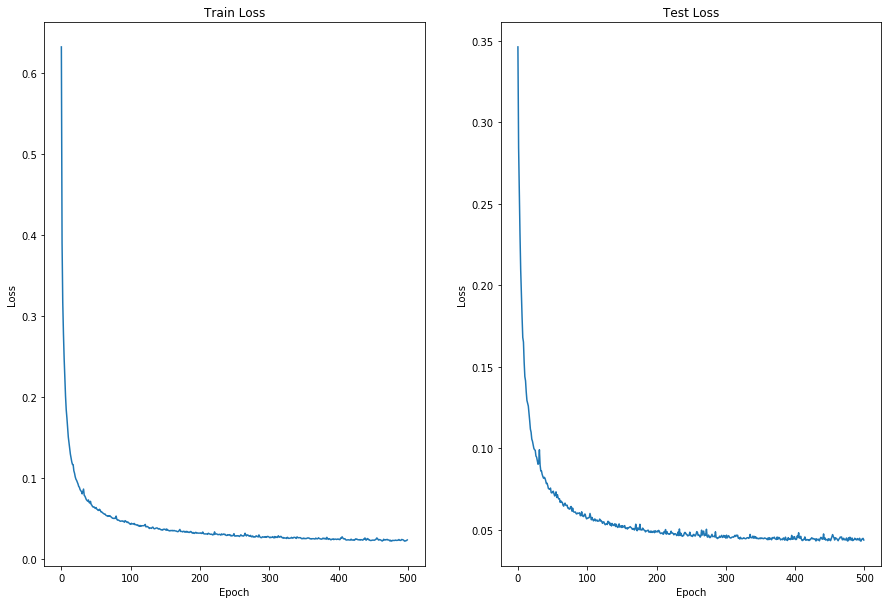

In [26]:
plt.figure(figsize=(15,10))
ax = plt.subplot(1, 2, 1)
plt.plot(history.history["loss"])
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.title("Train Loss")
ax = plt.subplot(1, 2, 2)
plt.plot(history.history["val_loss"])
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.title("Test Loss")

Text(0.5, 1.0, 'Test MSE')

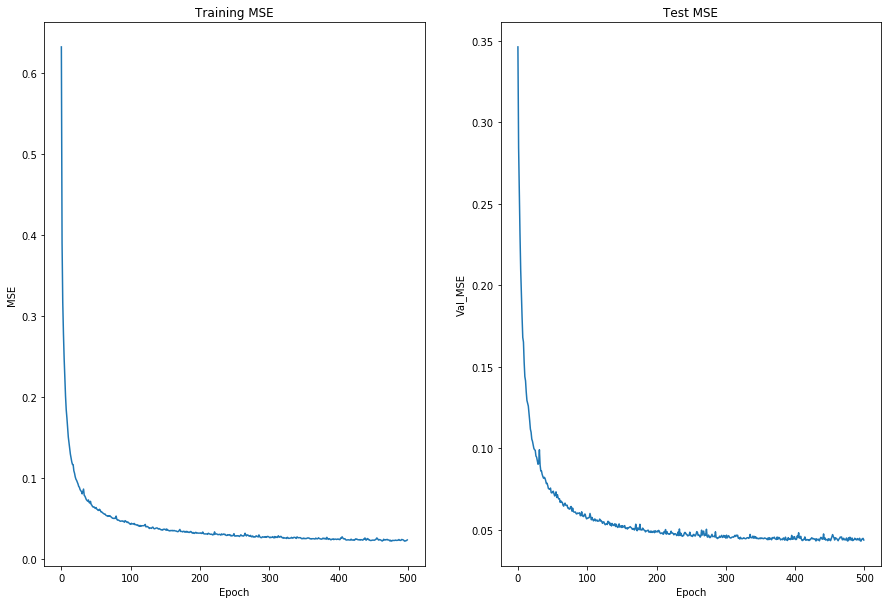

In [27]:
plt.figure(figsize=(15,10))
ax = plt.subplot(1, 2, 1)
plt.plot(history.history["mean_squared_error"])
plt.ylabel('MSE')
plt.xlabel('Epoch')
plt.title("Training MSE")
ax = plt.subplot(1, 2, 2)
plt.plot(history.history["val_mean_squared_error"])
plt.ylabel('Val_MSE')
plt.xlabel('Epoch')
plt.title("Test MSE")

Text(0.5, 1.0, 'Test Loss')

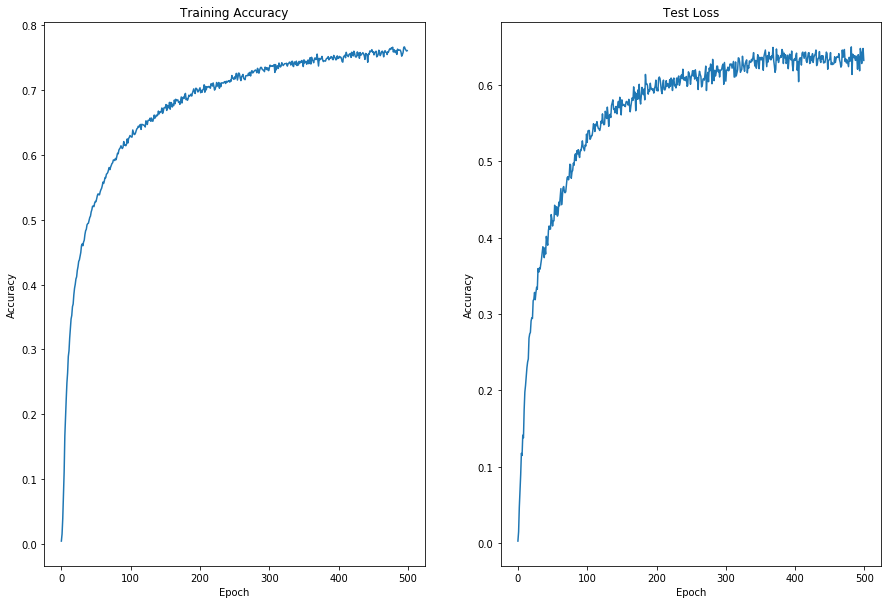

In [28]:
plt.figure(figsize=(15,10))
ax = plt.subplot(1, 2, 1)
plt.plot(history.history["accuracy"])
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.title("Training Accuracy")
ax = plt.subplot(1, 2, 2)
plt.plot(history.history["val_accuracy"])
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.title("Test Loss")

In [29]:
# use our encoded layer to encode the training input
encoder = Model(inputs, encoded)
encoded_input = Input(shape=(450,))
decoder_layer = deep_autoencoder.layers[-1]
decoder = Model(encoded_input, decoder_layer(encoded_input))
encoded_data = encoder.predict(train_df_transformed)

In [30]:
columns=[]
for i in range(0,150):
#     name=
#     print(name)
    columns.append("AE "+str(i))
principalDf = pd.DataFrame(data = encoded_data
             , columns = columns)
principalDf.head(5)

,AE 0,AE 1,AE 2,AE 3,AE 4,AE 5,AE 6,AE 7,AE 8,AE 9,...,AE 140,AE 141,AE 142,AE 143,AE 144,AE 145,AE 146,AE 147,AE 148,AE 149
0,0.0,0.0,0.096965,0.089480,0.113244,0.0,0.165388,0.0,0.185838,0.248065,...,0.085400,0.0,0.111138,0.228380,0.0,0.0,0.0,0.273951,0.105431,0.132115
1,0.0,0.0,0.114212,0.085658,0.092414,0.0,0.158394,0.0,0.184712,0.245019,...,0.075535,0.0,0.126697,0.232929,0.0,0.0,0.0,0.249104,0.107425,0.116968
2,0.0,0.0,0.095473,0.080132,0.097349,0.0,0.157385,0.0,0.152342,0.261531,...,0.124505,0.0,0.124736,0.255231,0.0,0.0,0.0,0.244824,0.100097,0.129437
3,0.0,0.0,0.107524,0.082612,0.108018,0.0,0.163744,0.0,0.170311,0.245564,...,0.093677,0.0,0.124340,0.248507,0.0,0.0,0.0,0.236954,0.117074,0.123651
4,0.0,0.0,0.114334,0.089594,0.094622,0.0,0.160824,0.0,0.177617,0.244992,...,0.072121,0.0,0.118419,0.247442,0.0,0.0,0.0,0.246372,0.117148,0.115779


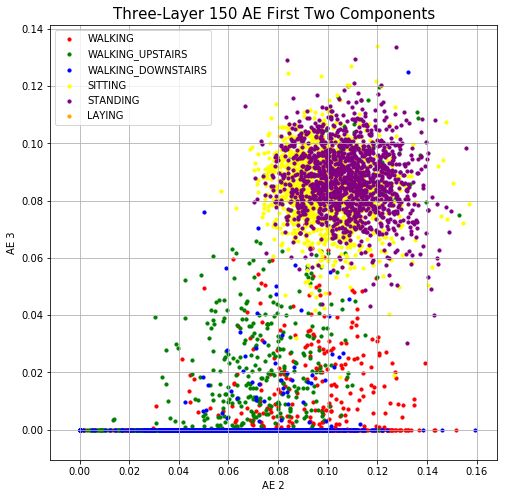

In [33]:
principalDf["activity_name"]=train_df_activities.loc[:,["activity_name"]]

fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('AE 2', fontsize = 10)
ax.set_ylabel('AE 3', fontsize = 10)
ax.set_title('Three-Layer 150 AE First Two Components', fontsize = 15)


targets = ['WALKING', 'WALKING_UPSTAIRS', 'WALKING_DOWNSTAIRS',"SITTING","STANDING","LAYING"]
colors = ['r', 'g', 'b', 'yellow', 'purple','orange']
for target, color in zip(targets,colors):
    indicesToKeep = principalDf['activity_name'] == target
    ax.scatter(principalDf.loc[indicesToKeep, 'AE 2']
               , principalDf.loc[indicesToKeep, 'AE 3']
               , c = color
               , s = 10)
ax.legend(targets)
ax.grid()